# Notebook Contents


In [1]:
from IPython.core.display import HTML

In [2]:
                import os
                import pandas             as pd
                import numpy              as np
                import seaborn            as sns
                import matplotlib.pyplot  as plt
from tabulate   import tabulate
                import json
from scipy      import stats

# Comment this if the data visualisations doesn't work
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.color'] = '#474545'
plt.rcParams['axes.edgecolor'] = '#474545'

# plt.style.use('fivethirtyeight')

## Connection string
To make connection with DataBase (SQL, Access, Excel, etc.) required library PYODBC

More good samples how to use can finde in:
    [Wiki](https://github.com/mkleehammer/pyodbc/wiki)

# Data description:

In [3]:
data = pd.read_csv(
    '../input/WED_setup_data.csv', sep=',', header=0)

schema = pd.read_csv('../input/WED_setup_data_headers.csv', 
    sep=',', 
    header='infer',
    names=['DROP','TYPE','ID','NAME','CATEGORIES'],
    encoding = "utf_8", 
    engine='python')

schema[['TYPE', 'ID', 'NAME']].head()



,TYPE,ID,NAME
0,id,ID,Detalės ID
1,categorical,TYPE-1,Detalės tipas
2,categorical,FAMILY,Gaminių šeima
3,categorical,TYPE-2,Detalės tipas 2
4,categorical,COLOR,Detalės spalva


# Data Mungy *(Duomenų paruošimas (Pre-processing))*

* Transform the data;
* Normalize the data;
* Eliminate outliers

Check data sets for missing values

In [4]:
print('Bad rows (with missing values) caunt: ', data.shape[0]-data.dropna().shape[0],
     '\nRaw data shape: ', data.shape,
     '\nClean data shape: ', data.dropna().shape,);

Bad rows (with missing values) caunt:  0 
Raw data shape:  (265, 80) 
Clean data shape:  (265, 80)


### Transform the data
Seperate data to differents categorys by type

In [5]:
id = ['ID']
continuous = schema.loc[(schema['TYPE']=='continuous') & (schema['DROP']!=True)]['ID'].to_list()  
categorical = schema.loc[(schema['TYPE']=='categorical') & (schema['DROP']!=True)]['ID'].to_list()  
binary = schema.loc[(schema['TYPE']=='binary') & (schema['DROP']!=True)]['ID'].to_list()
drop_expert = schema.loc[(schema['DROP']==True)]['ID'].to_list()   

print(
    'Key value: ', len(id),
    '\nCategorical dimensions: ', len(categorical),
    '\nBinary dimensions: ', len(binary),
    '\nContinuous dimensions: ', len(continuous),
    '\nNot useful values based on opinion current work area experts: ', len(drop_expert)
)

Key value:  1 
Categorical dimensions:  51 
Binary dimensions:  19 
Continuous dimensions:  3 
Not useful values based on opinion current work area experts:  6


Nustatomos kategoriniai kintamieji kurie yra menami t.y. juos sudaro tik viena kategorija.


In [6]:
schema['CATEGORIES'] = schema.apply(
    lambda row: 
    (
        data[str(row['ID'])].nunique()
        if str(row['TYPE']) in ['categorical', 'binary'] else None
    ), axis = 1)
schema[schema['CATEGORIES']==1]

# data[schema['ID']].nunique()

,DROP,TYPE,ID,NAME,CATEGORIES
10,False,binary,LIFT-1,Pakėlimo liftas (1),1.0
19,False,binary,V-GROOVE,Vertikalus griovelis,1.0
28,False,categorical,DRILL-1-1318,Gręžimo blokas 1 / Gręžimo galvos 1318 / špind...,1.0
29,False,categorical,DRILL-1-1924,Gręžimo blokas 1 / Gręžimo galvos 1924 / špind...,1.0
33,False,categorical,DRILL-2-1318,Gręžimo blokas 2 / Gręžimo galvos 1318 / špind...,1.0
34,False,categorical,DRILL-2-1924,Gręžimo blokas 2 / Gręžimo galvos 1924 / špind...,1.0
43,False,binary,SPLITTER-2,Ruošinio dalinimo mašina (2),1.0
49,False,categorical,HEAD-X-1-1318,Gręžimo blokas 1 / Gręžimo galvos 1318-1 / Grą...,1.0
50,False,categorical,HEAD-X-1-1924,Gręžimo blokas 1 / Gręžimo galvos 1924-1 / Grą...,1.0
54,False,categorical,HEAD-X-2-1924,Gręžimo blokas 1 / Gręžimo galvos 1924-2 / Grą...,1.0


In [7]:
categories = int(schema['CATEGORIES'].sum())
drop_categories_anlz = schema[schema['CATEGORIES']==1]['ID'].to_list()
print(
    '\nDATA TYPES/ FIELD NAMES',
     '\n',
    '\nCaunted total categorical dimensions/total categories/fake categories: ', len(categorical),'/',categories,'/',len(drop_categories_anlz),
    '\nCaunted total binary data: ', len(binary),
    '\nCaunted total continuous data: ', len(continuous)
)


DATA TYPES/ FIELD NAMES 
 
Caunted total categorical dimensions/total categories/fake categories:  51 / 428 / 13 
Caunted total binary data:  19 
Caunted total continuous data:  3


Drop fields from dataset

In [8]:
schema['DROP'] = schema.apply(
    lambda row: 
    True if row['CATEGORIES'] == 1 else row['DROP'], 
    axis = 1)

drop = schema.loc[schema['DROP']==True]['ID'].to_list() 

continuous = schema[(~schema['DROP']) & (schema['TYPE']=='continuous')]['ID'].to_list()  
categorical = schema[(~schema['DROP']) & (schema['TYPE']=='categorical')]['ID'].to_list()   
binary = schema[(~schema['DROP']) & (schema['TYPE']=='binary')]['ID'].to_list()   


# Exploratory analysis

In [9]:
#plt.rcParams
dimensions = continuous + categorical+ binary

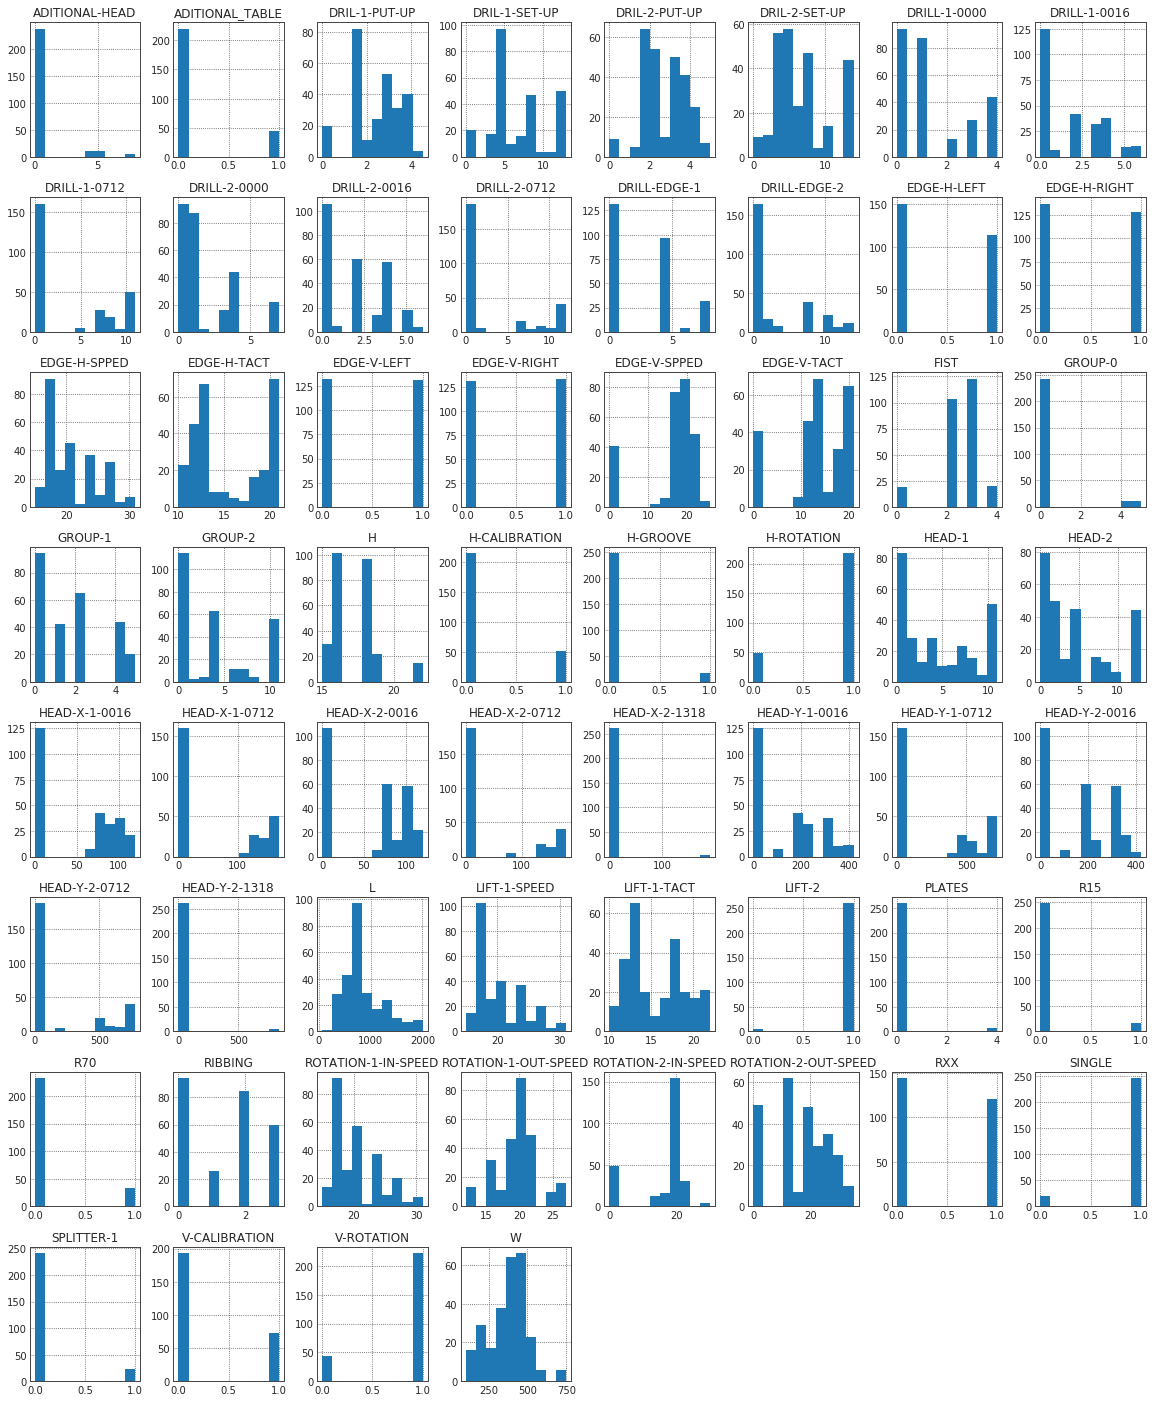

In [11]:
data[dimensions].hist(figsize=(20, 25), xlabelsize=10, ylabelsize=10);
# , bins=50

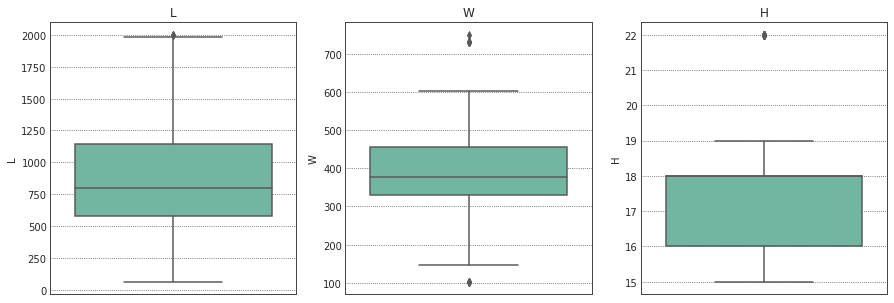

In [10]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharex=True)
axes = axes.flatten()

for ax, row in zip(axes, continuous):
    
    sns.boxplot(
                data=data,
                y=row,
                ax = ax,
                palette="Set2"
                ).set(title=row)

### Correlation

In [12]:

data[id + categorical + continuous + binary].corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [13]:
dataCorr = data.corr(method='pearson')
# viariant when matrix is diogonal
dataCorr = dataCorr.mask(np.tril(np.ones(dataCorr.shape)).astype(np.bool))

# when need all correlation items
dataCorr = dataCorr[abs(dataCorr) >= 1].stack().reset_index()

# when need just NPC correlation
# dataCorr = dataCorr.stack().reset_index()
dataCorr



,level_0,level_1,0
0,H-GROOVE,R15,1.0


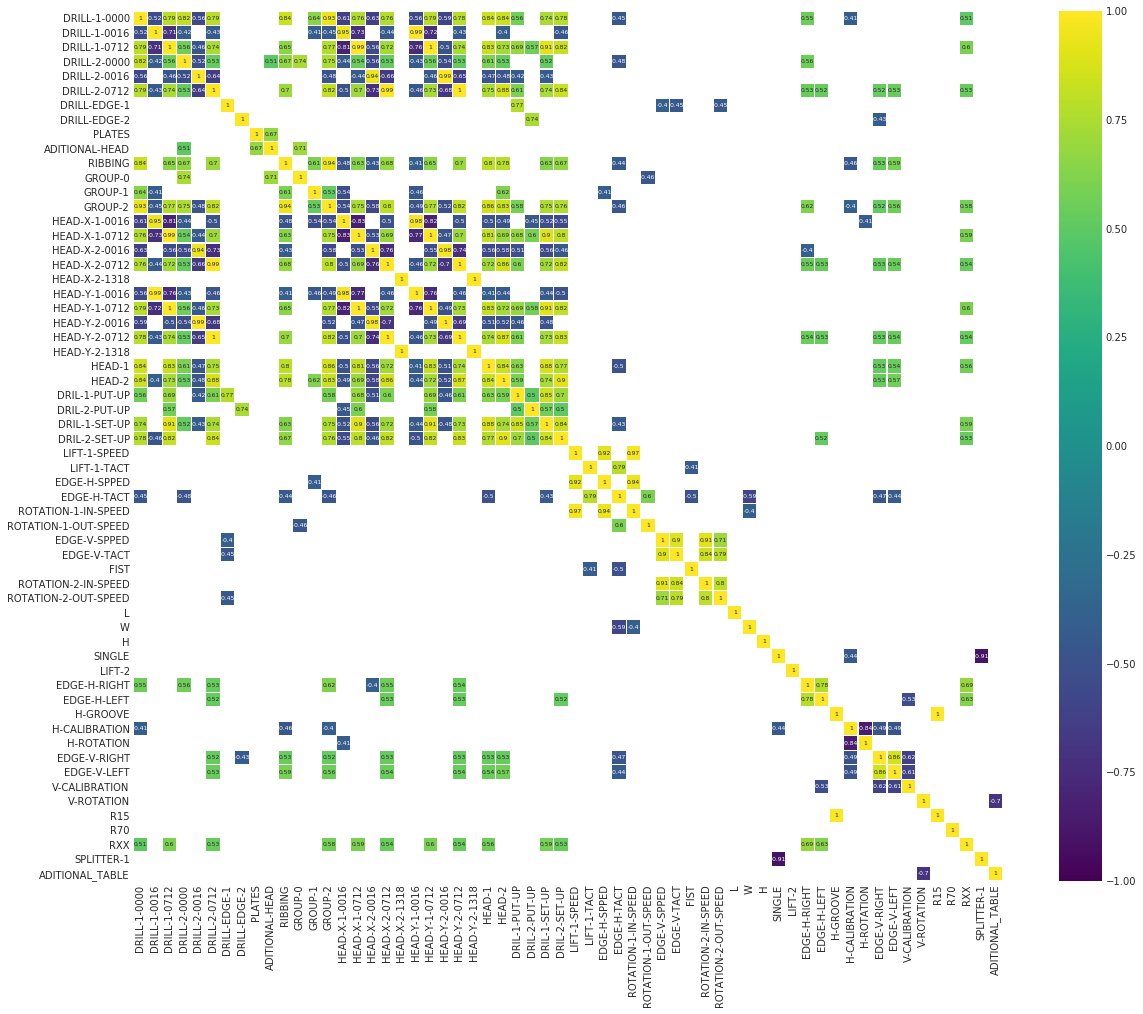

In [14]:
corr = data[id + categorical + continuous + binary].corr(method='pearson') # We already examined SalePrice correlations
plt.figure(figsize=(20, 16))

p = sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 6}, square=True);


In [15]:
drop_correlation = ['H-GROOVE']

schema['DROP'] = schema.apply(
    lambda row: 
    True if row['ID'] in drop_correlation else row['DROP'], 
    axis = 1)

continuous = schema[(~schema['DROP']) & (schema['TYPE']=='continuous')]['ID'].to_list()  
categorical = schema[(~schema['DROP']) & (schema['TYPE']=='categorical')]['ID'].to_list()   
binary = schema[(~schema['DROP']) & (schema['TYPE']=='binary')]['ID'].to_list()   


**Įžvalgos:** peržvelgus korelecijos matrica įžvelgiamas ryšys tarp dimensijų, ryšiai yra dviejų tipų tiek tiesiniai tiek atvirkščiai proporcingi. *(Augant įėjimo greičiui auga ir išėjimo greitis kas riamentis ekspertine nuomuone tesinga)* Tiesinė ir atvirkštinė priklausomybė priklausomybė įžvelgiama visose porose, skirtingi tik priklausomybės stiprumai tarp porų. Korelecija tarp dimensijų pilnai suprantamos remiantis tuo, kad charakterizuojami duomenys yra didžioji dalis apdirbimo linijos įvairių segmentų pastųmos greičiai (Tarpusavio sasaja tiesinis ryšys). Tačiau dauguma šių parametrų yra categoriniai taip kaip visi jie reikalauja pilno perreguliavimo nepriklausomai nuo dimensijos artumo pagal skaitinę vertę. Atsižvelgiant korelecijos analizė mums parodo naudingą informaciją kur dimensijų porų korelecijos koeficientas =1. tokiu atveju vieną iš dimensijų galima šalinti iš duomenų imties. Šiuo atveju taip yra su: **H-GROVE** ir **R15** pora. iš imties pašalinama dimensija **H-GROOVE**


### QQ - Plot diagrama

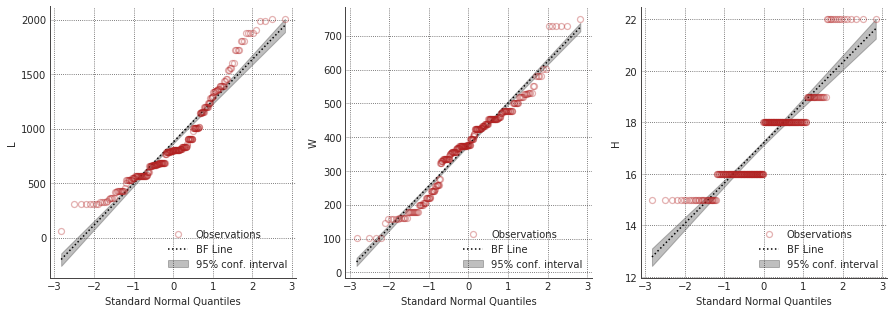

In [16]:
df = pd.read_csv('../output/data_nm.csv')

import probscale 
from sympy import *
import pytest

def QQplot(attribute, options, lognorm_true):

    if lognorm_true:
        lognorm_params = stats.lognorm.fit(data[attribute], floc=0)
        lognorm = stats.lognorm(*lognorm_params)
        options.update(dist=lognorm)

    probscale.probplot(
        data[attribute].tolist(), 
        plottype='qq',
        bestfit=True, 
        estimate_ci=True,
        problabel='Standard Normal Quantiles', 
        datalabel=attribute,
        **options
    )

    ax.legend(loc='lower right')
    #ax.set_ylim(bottom=-1, top=1)
    sns.despine(fig)

scatter_options=dict(
    marker ='o',
    markerfacecolor='none',
    markeredgecolor='firebrick',
    markeredgewidth=1.25,
    linestyle='none',
    alpha=0.35,
    zorder=5,
    label='Observations'
)

line_options=dict(
    label = 'BF Line', 
    color = 'black',
    linestyle=':',
    linewidth = 1.5
)

options = dict(
    scatter_kws = scatter_options,
    line_kws = line_options,
    ax = None
)

fig, axes = plt.subplots(1,3, figsize=(15,5), sharex=True)
axes = axes.flatten();

for ax, attribute in zip(axes, continuous):
    options['ax'] = ax
    QQplot(attribute, options, False)

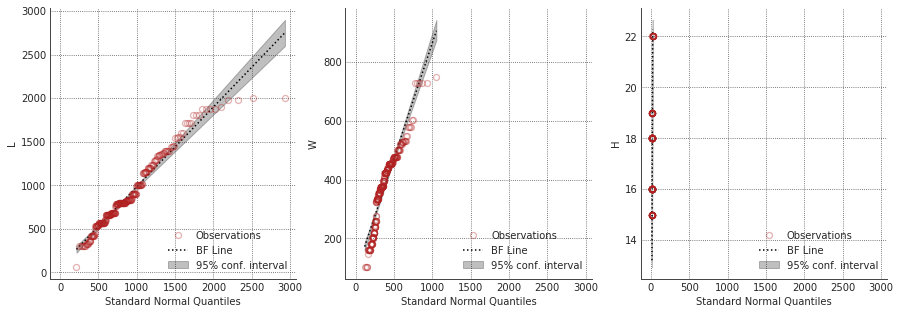

In [17]:


fig, axes = plt.subplots(1,3, figsize=(15,5), sharex=True)
axes = axes.flatten();

for ax, attribute  in zip(axes, continuous):
    options['ax'] = ax
    QQplot(attribute, options, True)

In [18]:
schema

,DROP,TYPE,ID,NAME,CATEGORIES
0,False,id,ID,Detalės ID,NaN
1,True,categorical,TYPE-1,Detalės tipas,7.0
2,True,categorical,FAMILY,Gaminių šeima,4.0
3,True,categorical,TYPE-2,Detalės tipas 2,3.0
4,True,categorical,COLOR,Detalės spalva,5.0
...,...,...,...,...,...
75,False,categorical,EDGE-V-SPPED,Vertikalaus kraštų briaunavimo staklių greitis,9.0
76,False,categorical,EDGE-V-TACT,Vertikalaus kraštų briaunavimo staklių taktas,13.0
77,False,categorical,FIST,Prispaudimo kumščių skaičius,4.0
78,False,categorical,ROTATION-2-IN-SPEED,Pasukimo stalo (2) įėjimo greitis,10.0


In [20]:
print(
    'Count droped variables (recomendation of the current work area expert): ', len(drop_expert),
    '\nCount droped variables where contain just 1 one unique value: ', len(drop_categories_anlz),
    '\nCount droped values based on correlation analysis correlation==1: ', len(drop_correlation),
    '\nCount total droped values: ', len(schema.loc[(schema['DROP']==True)]['ID'].to_list()),
    '\nCount continuous values: ',schema[(~schema['DROP']) & (schema['TYPE']=='continuous')]['ID'].count(),'/',schema[(schema['TYPE']=='continuous')]['ID'].count(),
    '\nCount categorical values: ',schema[(~schema['DROP']) & (schema['TYPE']=='categorical')]['ID'].count(),'/',schema[(schema['TYPE']=='categorical')]['ID'].count(),
    '\nCount unique categories: ', int(schema[~schema['DROP']]['CATEGORIES'].sum()),
    '\nCount binary values: ',schema[(~schema['DROP']) & (schema['TYPE']=='binary')]['ID'].count(),'/',schema[(schema['TYPE']=='binary')]['ID'].count(),
    '\nDroped values: ', json.dumps(drop_expert+drop_categories_anlz+drop_correlation, indent=4)
)

Count droped variables (recomendation of the current work area expert):  6 
Count droped variables where contain just 1 one unique value:  13 
Count droped values based on correlation analysis correlation==1:  1 
Count total droped values:  20 
Count continuous values:  3 / 3 
Count categorical values:  41 / 57 
Count unique categories:  369 
Count binary values:  15 / 19 
Droped values:  [
    "TYPE-1",
    "FAMILY",
    "TYPE-2",
    "COLOR",
    "CAUNTRY",
    "HOLES",
    "LIFT-1",
    "V-GROOVE",
    "DRILL-1-1318",
    "DRILL-1-1924",
    "DRILL-2-1318",
    "DRILL-2-1924",
    "SPLITTER-2",
    "HEAD-X-1-1318",
    "HEAD-X-1-1924",
    "HEAD-X-2-1924",
    "HEAD-Y-1-1318",
    "HEAD-Y-1-1924",
    "HEAD-Y-2-1924",
    "H-GROOVE"
]


In [19]:
def set_dummies(data, dummies):
    df = data
    for dummy in dummies:
        df_dummies = pd.get_dummies(data[dummy], prefix=dummy)
        df = pd.concat([df, df_dummies], axis=1)
    return df

df = set_dummies(data, categorical)

df = df.drop(drop_categories_anlz+drop_correlation+drop_expert+categorical, axis=1)

In [21]:
df.head()

,ID,L,W,H,SINGLE,LIFT-2,EDGE-H-RIGHT,EDGE-H-LEFT,H-CALIBRATION,H-ROTATION,...,ROTATION-2-OUT-SPEED_17,ROTATION-2-OUT-SPEED_18,ROTATION-2-OUT-SPEED_20,ROTATION-2-OUT-SPEED_21,ROTATION-2-OUT-SPEED_23,ROTATION-2-OUT-SPEED_25,ROTATION-2-OUT-SPEED_26,ROTATION-2-OUT-SPEED_27,ROTATION-2-OUT-SPEED_30,ROTATION-2-OUT-SPEED_35
0,S735SOB1101KCHE,529.0,375,16,0,1,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1,S735SOB1101KWHE,529.0,375,16,0,1,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
2,S735SOB1101DCHE,529.0,375,16,0,1,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,S735SOB1101DWHE,529.0,375,16,0,1,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,S735KPB1301UBLA,800.0,369,18,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
data[continuous] = data[continuous].astype(np.float64)
data[categorical] = data[categorical].astype(np.object)
data[binary] = data[binary].astype(np.uint8)
data[id] = data[id].astype(np.object)

schema.to_csv('../output/mungy/schema.csv', index = False)

### Normalize the data
* [Sample of normalize without anny puckage](https://stackoverflow.com/a/12525836/7347438)
* [Sample of normalize with sklearn](https://stackoverflow.com/a/37199623/7347438)
* [Sample of normalize without anny puckage *(apply)*](https://stackoverflow.com/a/33250288/7347438)

In [23]:
df[continuous] = df[continuous].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [24]:
df.to_csv('../output/mungy/data_nm.csv', index = False)

In [25]:
# import subprocess

# command = f'jupyter nbconvert Exploratory_analysis.ipynb --output Exploratory_analysis.html'
# subprocess.call(command)

from IPython.display import Javascript
from nbconvert import HTMLExporter
from IPython.display import Javascript

def save_notebook():
    display(
        Javascript("IPython.notebook.save_notebook()"),
        include=['application/javascript']
    )

def output_HTML(read_file, output_file):
    import codecs
    import nbformat
    exporter = HTMLExporter()
    # read_file is '.ipynb', output_file is '.html'
    output_notebook = nbformat.read(read_file, as_version=4)
    output, resources = exporter.from_notebook_node(output_notebook)
    codecs.open(output_file, 'w', encoding='utf-8').write(output)

In [26]:
import time

save_notebook()
time.sleep(3)
current_file = 'Exploratory_analysis.ipynb'
output_file = 'Exploratory_analysis.html'
output_HTML(current_file, output_file)

### Eliminate outliers